## Forest Fire Prediction Model

## NAME : MALINI M NAIR
#### Organization : Entri Elevate
#### Date: 28-03-2024

### 1. Overview of problem statement:
predicting the area affected by forest ires is crucial for efficient resource allocation and minimizing damage. Accurate predictions can help in planning preventive measures and optimizing firefighting efforts.

### 2. Objective:
To develop an accurate forest fire area prediction model using machine learning techniques.

### 3. Data Description:¶
Source: https://www.kaggle.com/datasets/adarshmsd1/algerian-forest-fire-cleaned 

## Features:
1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

Weather data observations

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

3. RH : Relative Humidity in %: 21 to 90

4. Ws : Wind speed in km/h: 6 to 29

5. Rain: total day in mm: 0 to 16.8

FWI Components

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

8. Drought Code (DC) index from the FWI system: 7 to 220.4

9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

10. Buildup Index (BUI) index from the FWI system: 1.1 to 68

11. Fire Weather Index (FWI) Index: 0 to 31.1

12. Classes: two classes, namely Fire and not Fire

In [838]:
pip install statsmodels


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [839]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import bz2,pickle

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [840]:
data = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header= 1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [841]:
df = data.copy()
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [842]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [843]:
df.shape

(246, 14)

### Data Cleaning

In [844]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [845]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [846]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)

In [847]:
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [848]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [849]:
# Remove null or na values rows
df =df.dropna().reset_index(drop=True) 
df.shape

(244, 15)

In [850]:
# Column which has string
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [851]:
df[df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [852]:
#remove 122th column
df1 = df.drop(122).reset_index(drop=True)
pd.set_option('display.max_rows', None)
df1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [853]:
df1.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [854]:
df1.shape

(243, 15)

In [855]:
# inorder to check the row which is having the missing values
df1[df1.isnull().any(axis=1)] 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [856]:
# List out column names to check 
df1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [857]:
# Spaces were fixed in the column names
df1.columns = df1.columns.str.strip()
df1.columns 

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [858]:
df1[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = df1[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)

In [859]:
objects = [features for features in df1.columns if df1[features].dtypes=='O']
for i in objects:
    if i != 'Classes':
        df1[i] = df1[i].astype(float)

In [860]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [861]:
df1.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,2.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,2.000000


In [862]:
df1.describe(include = 'all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243,243.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fire,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131,NaN
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,NaN,1.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,NaN,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,NaN,1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,NaN,1.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,NaN,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,NaN,2.000000


In [863]:
df1["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [864]:
df1.Classes = df1.Classes.str.strip()

In [865]:
df1["Classes"].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [866]:
df1[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,1
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


In [867]:
df1[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
127,6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire,2
128,7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6.0,fire,2
129,8,6,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire,2
130,9,6,2012,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,not fire,2
131,10,6,2012,30,41,15,0.0,89.4,13.3,22.5,8.4,13.1,10.0,fire,2


In [868]:
print(df1.dtypes)

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int32
dtype: object


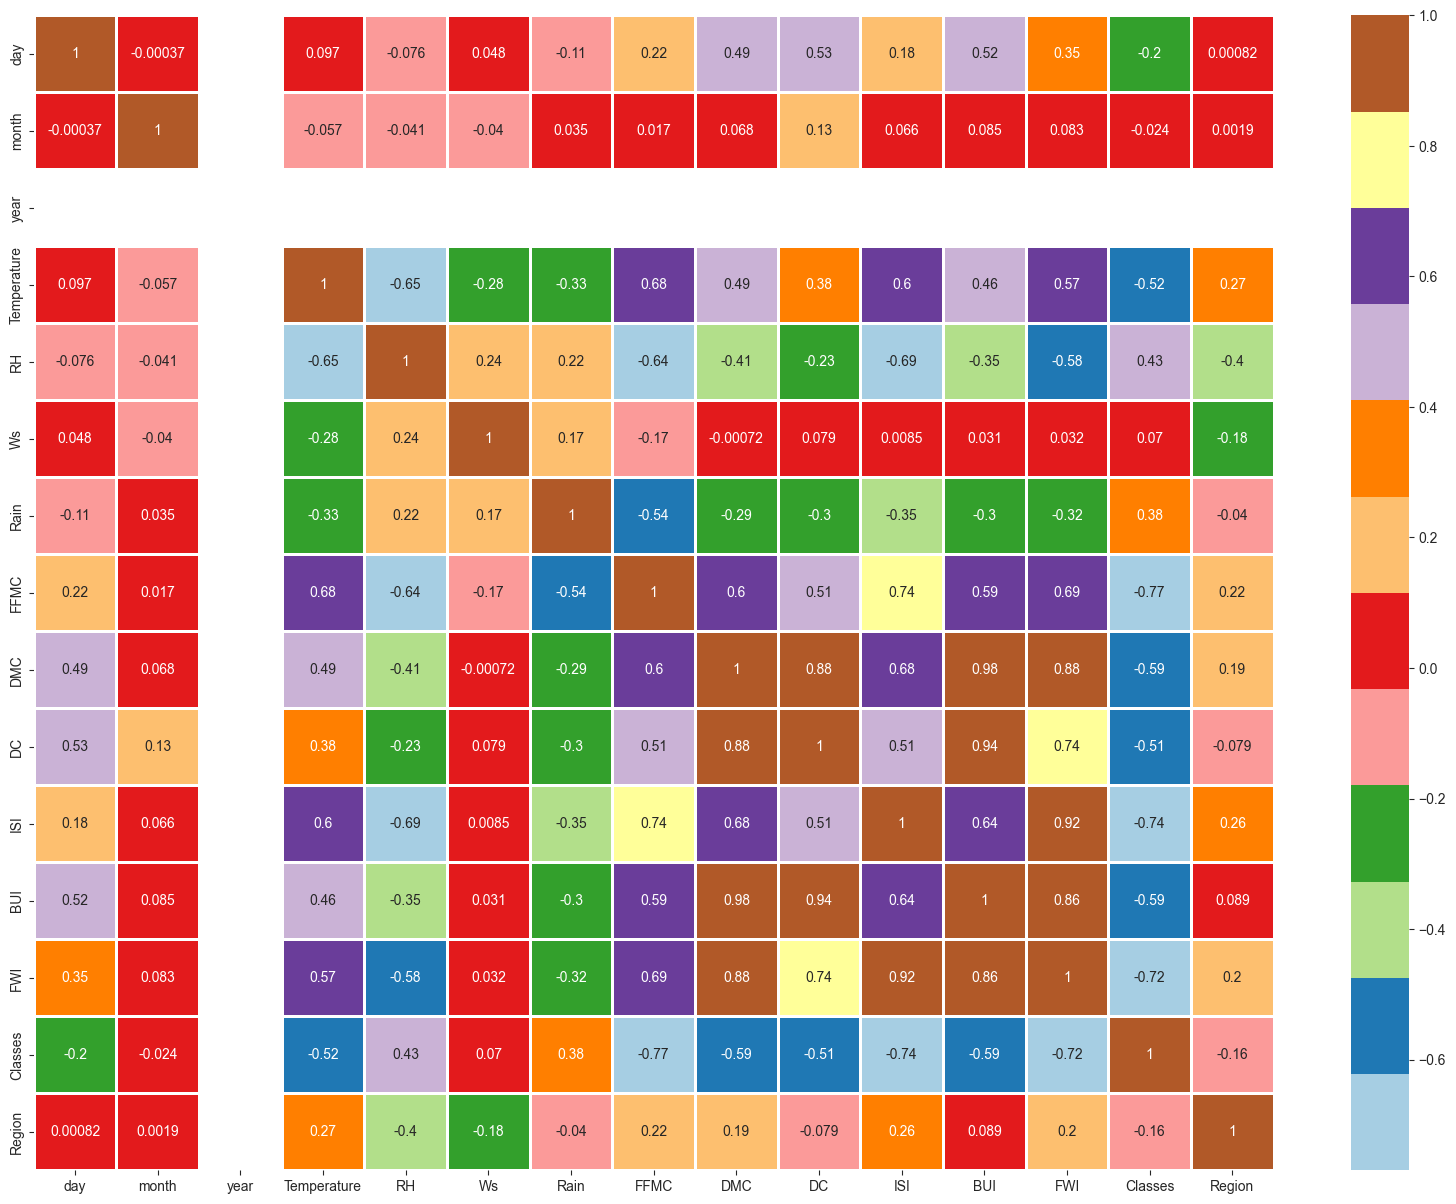

In [869]:
# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, linewidths=1, linecolor="white", cbar=True, cmap="Paired", xticklabels="auto", yticklabels="auto")
plt.show()

In [870]:
df1.shape

(243, 15)

In [871]:
# Encoding Not fire as 0 and Fire as 1
df1['Classes']= np.where(df1['Classes']== 'not fire',0,1)
df1.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,1
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,1


In [872]:
# Check counts
df1.Classes.value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

<Axes: >

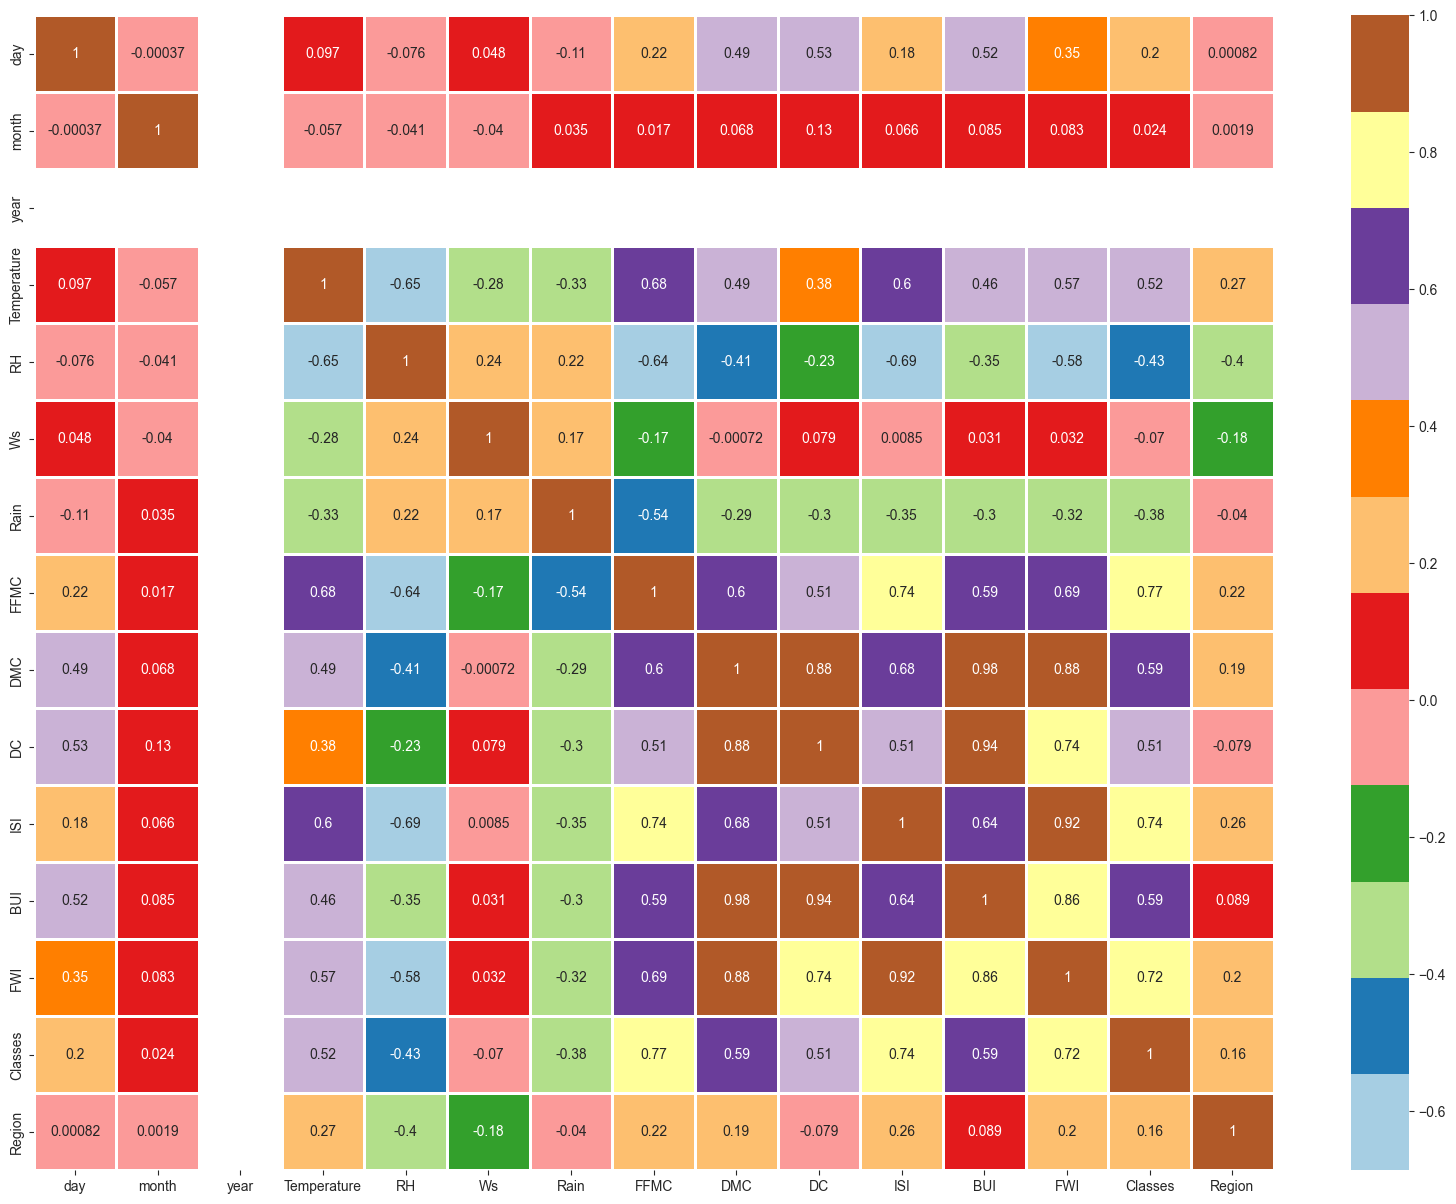

In [873]:
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(),annot= True,linewidths=1, linecolor="white", cbar=True, cmap = "Paired",xticklabels="auto", yticklabels="auto")

In [874]:
df1.to_csv('Algerian_forest_fire_cleaned-data.csv', index=False)

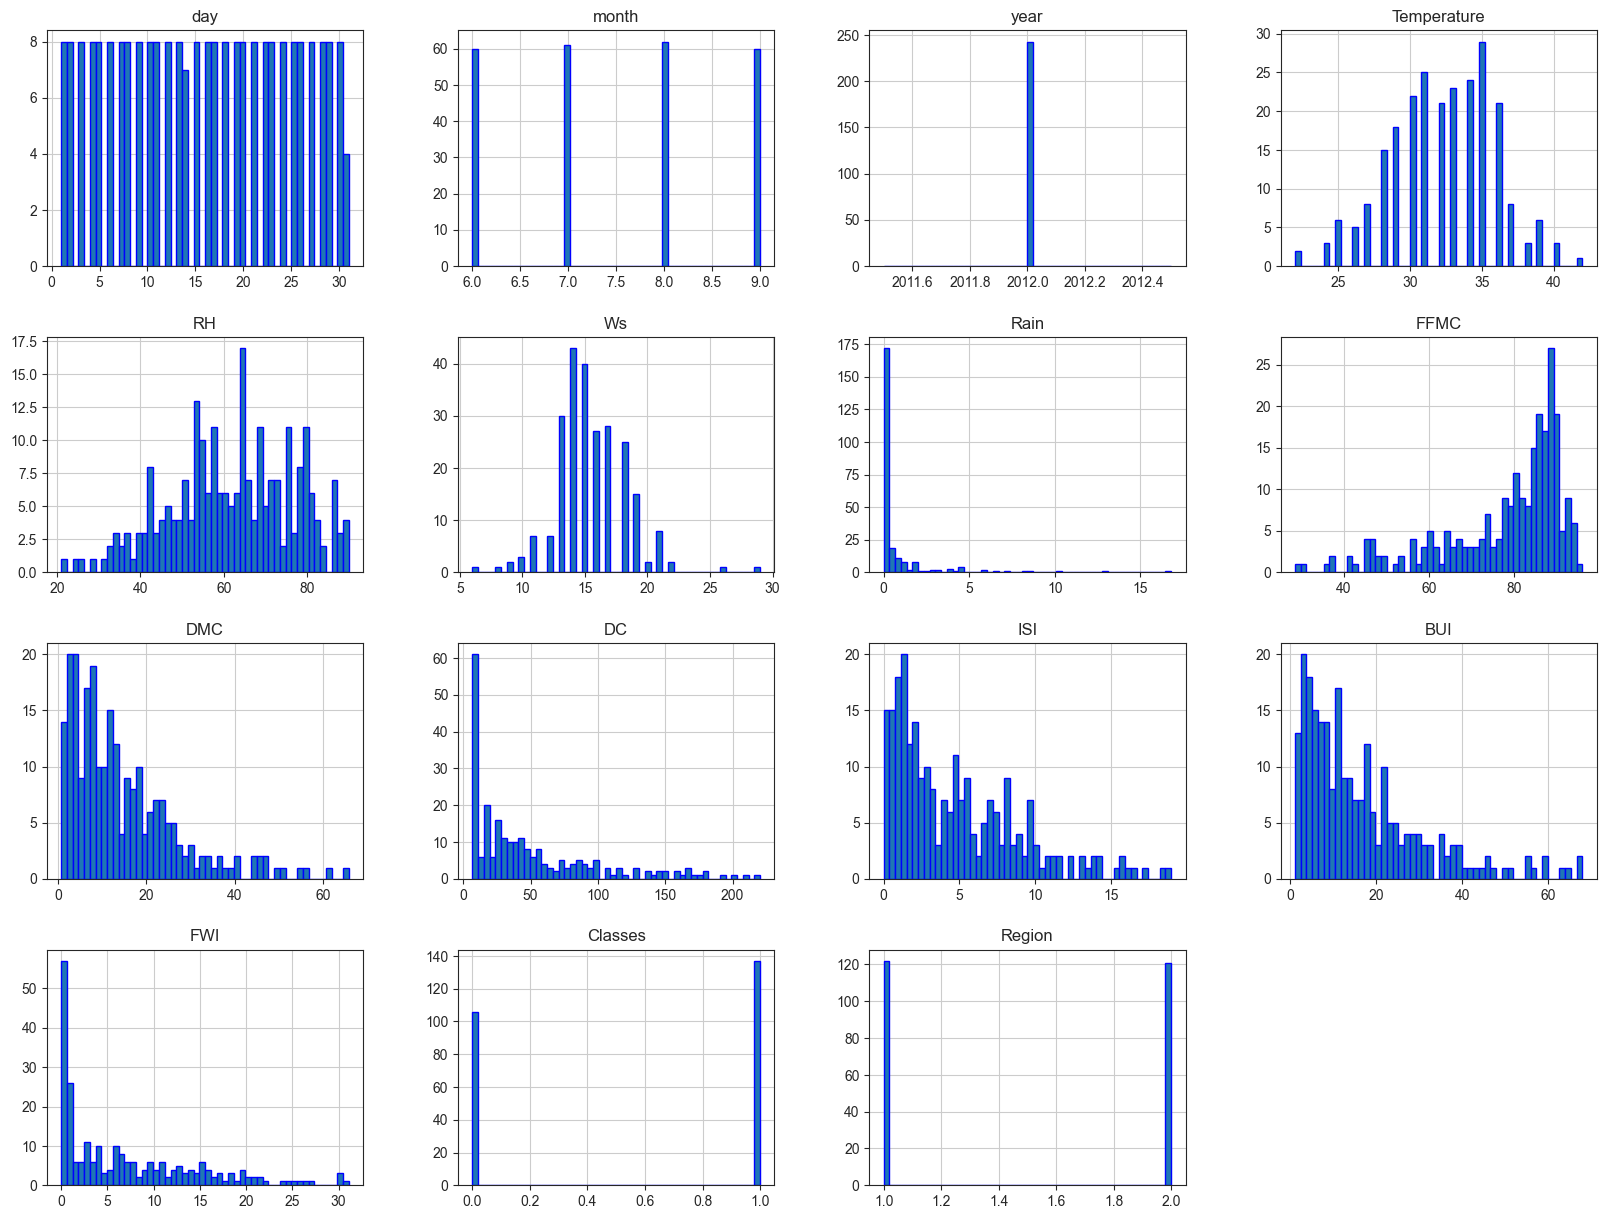

In [875]:
# PLot density plot for all features
#plt.style.use('seaborn')
df1.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [876]:
# Percentage for PieChart
percentage = df1.Classes.value_counts(normalize=True)*100
percentage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_5852\2282647322.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Classes', data=df1, palette="tab10")


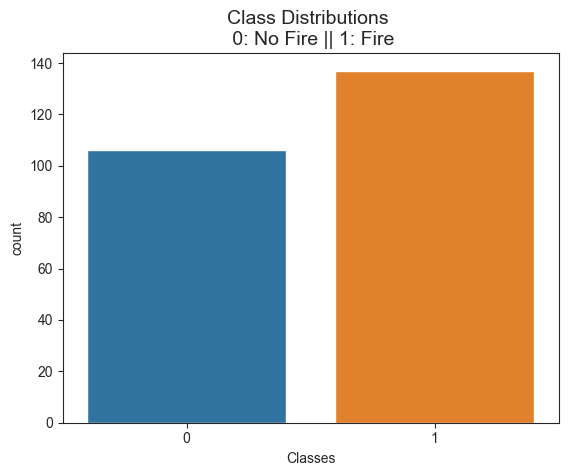

In [877]:
sns.countplot(x='Classes', data=df1, palette="tab10")
plt.title('Class Distributions \n 0: No Fire || 1: Fire', fontsize=14)  
plt.show()

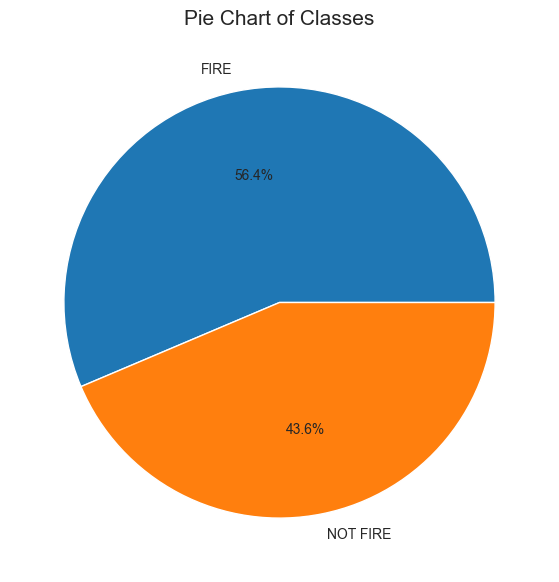

In [878]:
#plotting PieChart
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%')  
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show() 


### Monthwise Fire Analysis

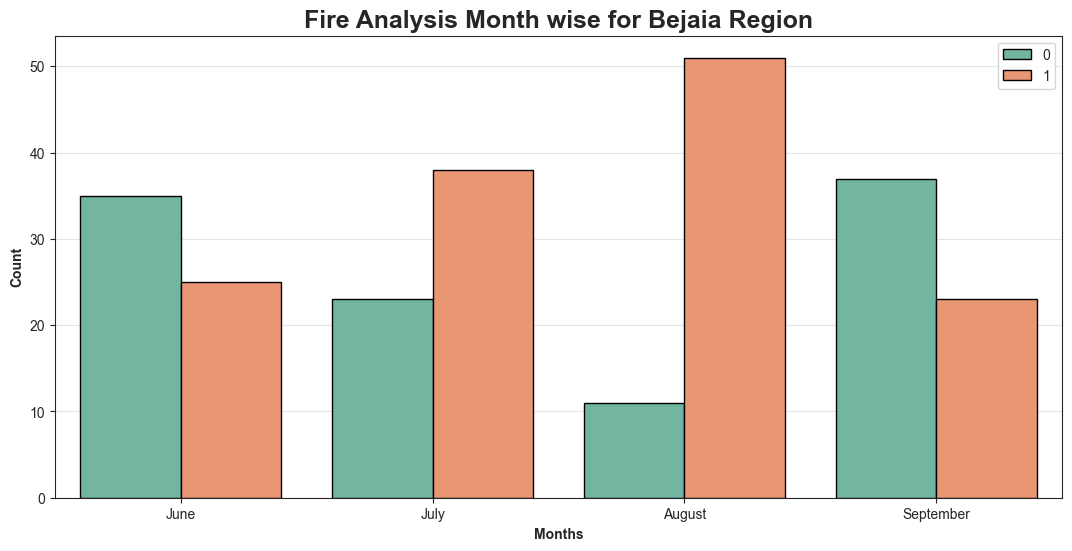

In [879]:
dftemp= df1.loc[df1['Region']== 1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df1,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

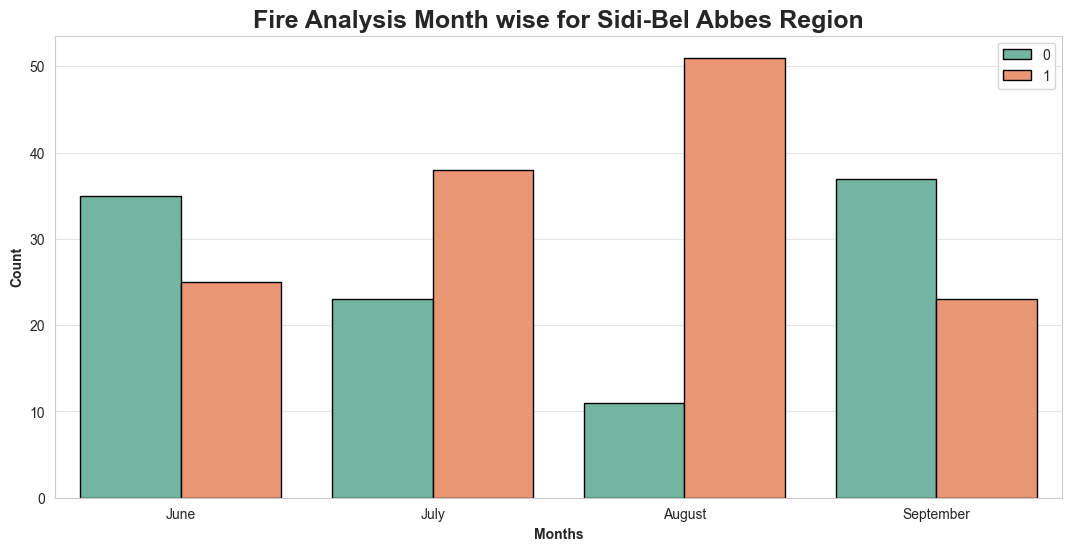

In [880]:
dftemp= df1.loc[df1['Region']== 2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df1,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

### Checking Multicollinearity

In [881]:
x = df1.iloc[:, 0:13]
y = df1['Classes']

In [882]:
x.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9


In [883]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: Classes, dtype: int32

In [884]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
print(vif_data)   

        feature         VIF
0           day    1.487120
1         month    1.088510
2          year  514.359602
3   Temperature    2.415204
4            RH    2.764923
5            Ws    1.312931
6          Rain    1.551373
7          FFMC    4.120286
8           DMC   76.480443
9            DC   25.363045
10          ISI   23.122783
11          BUI  171.616713
12          FWI   40.471391


**Regression Anslysis**

In [885]:
#Droping features ['day','month','year'] beacuse it is not important for analysis 
df2 = df1.drop(['day','month','year'], axis=1)
df2.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,1
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,1


### Spliting the dataset into input and output feature for the regression analysis

In [886]:
X = df2.iloc[:,0:10]
y= df2['FWI']

In [887]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [888]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

### Spliting the dataset into train and test

In [889]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,
                                                    random_state=0)
X_train.shape, X_test.shape

((182, 10), (61, 10))

In [890]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI'],
      dtype='object')

In [891]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.657325,-0.357016,-0.365941,0.684556,0.482965,0.349021,0.618172,0.447959,0.575406
RH,-0.657325,1.000000,0.262581,0.275592,-0.653649,-0.393893,-0.203883,-0.712353,-0.333027,-0.594299
Ws,-0.357016,0.262581,1.000000,0.204035,-0.226129,-0.010158,0.079699,-0.018845,0.023680,0.013239
Rain,-0.365941,0.275592,0.204035,1.000000,-0.589465,-0.300364,-0.302591,-0.347660,-0.308258,-0.326426
FFMC,0.684556,-0.653649,-0.226129,-0.589465,1.000000,0.621958,0.528275,0.742079,0.606527,0.704563
DMC,0.482965,-0.393893,-0.010158,-0.300364,0.621958,1.000000,0.884417,0.680918,0.984222,0.882314
DC,0.349021,-0.203883,0.079699,-0.302591,0.528275,0.884417,1.000000,0.501412,0.951157,0.746551
ISI,0.618172,-0.712353,-0.018845,-0.347660,0.742079,0.680918,0.501412,1.000000,0.632285,0.918573
BUI,0.447959,-0.333027,0.023680,-0.308258,0.606527,0.984222,0.951157,0.632285,1.000000,0.855633
FWI,0.575406,-0.594299,0.013239,-0.326426,0.704563,0.882314,0.746551,0.918573,0.855633,1.000000


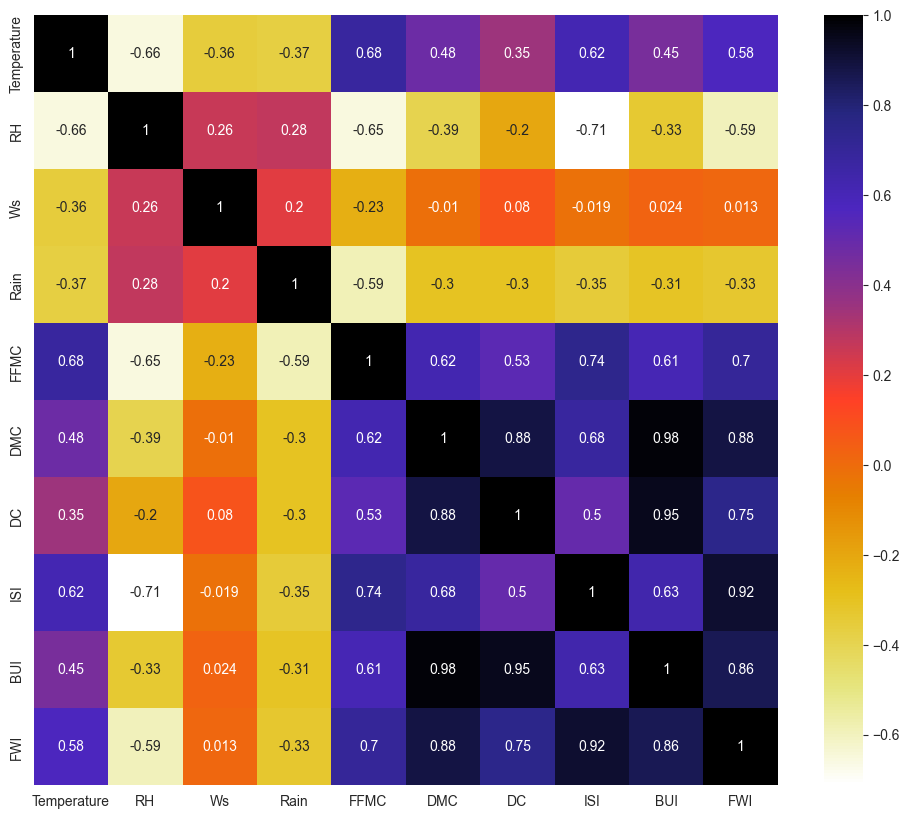

In [892]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

### Considering Correlation thresold value as 0.8.
### Check the correlation for independent features and the features having correlation more than 0.8 will remove from the analysis.


In [893]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [894]:
corr_features = correlation(X_train, 0.8)
corr_features

{'BUI', 'DC', 'FWI'}

### These three features are there which has correlation more than 0.8 so we will remove it

In [895]:
# drop features which has correlation more than 0.8
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 7), (61, 7))

### Scalling

In [896]:
def scaler_standard (X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

In [897]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

Text(0.5, 1.0, 'X_train After Scaling')

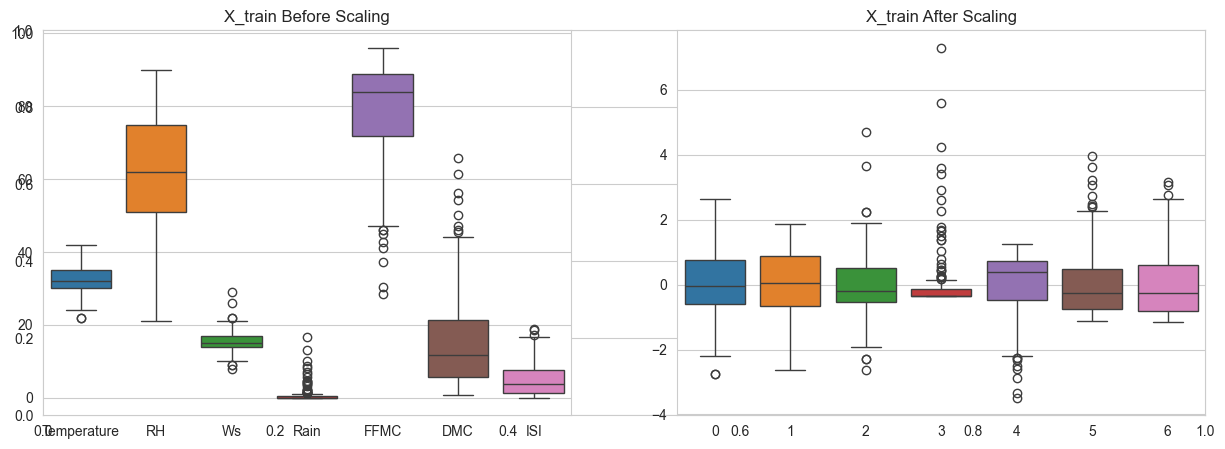

In [898]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Model Building For Regression Analysis

### Linear Regression

In [899]:
Linear_Regression = LinearRegression()
Linear_Regression.fit(X_train_scaled, y_train)

LinearRegression()

In [900]:
print('Intercept is :',Linear_Regression.intercept_)
print('Coefficient is :',Linear_Regression.coef_)

Intercept is : 7.558791208791209
Coefficient is : [-0.0283721   0.04109337  0.09627506 -0.01655616 -0.54243749  3.84845037
  4.99255741]


In [901]:
print("Training Score:",Linear_Regression.score(X_train_scaled, y_train))
print("Test Score:",Linear_Regression.score(X_test_scaled,y_test))

Training Score: 0.9695395305921733
Test Score: 0.9649932926605853


In [902]:
Linear_Regression_predict = Linear_Regression.predict(X_test_scaled)
Linear_Regression_predict

array([ 9.41506683,  7.60634268,  7.68400501,  5.87306673,  7.3204071 ,
       11.34540494, -0.58473564,  9.31241843,  5.2947767 , 12.68860125,
        1.57139689, 13.2981353 ,  6.47490843, 15.26509949,  1.01152587,
        0.81120535,  2.27728471,  2.67422231,  3.83854169,  1.11119187,
       10.66495822,  5.58060473,  7.0466882 , -0.44199717,  2.3401461 ,
        3.44770367, 10.05834609,  0.34170617,  1.2083714 ,  1.86224714,
       13.40002748,  0.93449111, -0.67888196, 19.91564396,  3.89121169,
        0.90915613,  1.28882678, 18.86588672, 25.91576425,  2.47906687,
        6.97663212,  0.64561693, -0.86232546,  1.40590421,  0.37128199,
       -0.60182731,  3.94663026,  6.97440062, -0.70005406, 10.67146818,
        3.94007684, 10.12127919, -0.53012129,  1.44974711,  6.40213474,
        1.73573959, 11.15055467,  3.46597162,  3.61834924, 17.39712585,
        3.48274909])

In [903]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Linear_Regression_predict})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,9.415067
150,7.2,7.606343
37,8.0,7.684005
75,6.3,5.873067
109,7.7,7.320407
71,12.1,11.345405
122,0.2,-0.584736
73,10.2,9.312418
154,5.2,5.294777
234,13.7,12.688601


In [904]:
meanAbErr = metrics.mean_absolute_error(y_test, Linear_Regression_predict)
meanSqErr = metrics.mean_squared_error(y_test, Linear_Regression_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, Linear_Regression_predict))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.7123674928595757
Mean Square Error: 1.2152366305269506
Root Mean Square Error: 1.1023777168135025


In [905]:
# To find coefficient of determination
r2 =  r2_score(y_test, Linear_Regression_predict)
print("R-Square:",r2)

R-Square: 0.9649932926605853


### Lasso Regression


In [906]:
from sklearn.linear_model import Lasso

Lasso_Regression = Lasso()
Lasso_Regression.fit(X_train_scaled, y_train)

Lasso()

In [907]:
print('Intercept is :',Lasso_Regression.intercept_)
print('Coefficient is :',Lasso_Regression.coef_)

Intercept is : 7.558791208791209
Coefficient is : [ 0.         -0.          0.         -0.          0.          3.14197888
  4.02820515]


In [908]:
print("Training Score:",Lasso_Regression.score(X_train_scaled, y_train))
print("Test Score:",Lasso_Regression.score(X_test_scaled,y_test))

Training Score: 0.9472315585164249
Test Score: 0.9376608745831527


In [909]:
Lasso_Regression_prediction = Lasso_Regression.predict(X_test_scaled)
Lasso_Regression_prediction

array([ 9.41205365,  7.99844254,  7.76713463,  6.42761844,  7.83424945,
       11.03474616,  0.37326534,  9.27417318,  5.89058614, 12.11675554,
        2.72767608, 12.55638802,  6.95133366, 14.13515689,  2.07735442,
        1.24093471,  3.10320145,  3.49365169,  4.72385091,  1.51841715,
       10.26716277,  6.14712828,  6.96067837,  0.42244758,  3.46938213,
        4.24233784,  9.83944744,  1.09703881,  1.31470808,  2.68483082,
       12.55370186,  1.49414759,  0.39087636, 17.96041947,  4.90661969,
        2.16540954,  2.41830086, 16.97516681, 22.97432223,  3.29295033,
        7.29260165,  1.57125023, -0.38573018,  2.6013912 ,  1.73340027,
       -0.37176998,  4.64610516,  7.30323258, -0.47711457, 10.22796835,
        4.88202857,  9.86532478, -0.37875008,  2.60504202,  6.64228   ,
        2.8087511 , 10.76789465,  4.44604691,  4.45302701, 15.93299497,
        4.35133325])

In [910]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Lasso_Regression_prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,9.412054
150,7.2,7.998443
37,8.0,7.767135
75,6.3,6.427618
109,7.7,7.834249
71,12.1,11.034746
122,0.2,0.373265
73,10.2,9.274173
154,5.2,5.890586
234,13.7,12.116756


In [911]:
meanAbErr = metrics.mean_absolute_error(y_test, Lasso_Regression_prediction)
meanSqErr = metrics.mean_squared_error(y_test, Lasso_Regression_prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, Lasso_Regression_prediction))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.1209175798372668
Mean Square Error: 2.164064960096106
Root Mean Square Error: 1.4710761231479852


In [912]:
# To find coefficient of determination
r2 =  r2_score(y_test, Lasso_Regression_prediction)
print("R-Square:",r2)

R-Square: 0.9376608745831527


### Ridge Regression

In [913]:
Ridge_Regression = Ridge()
Ridge_Regression.fit(X_train_scaled, y_train)

Ridge()

In [914]:
print('Intercept is :',Ridge_Regression.intercept_)
print('Coefficient is :',Ridge_Regression.coef_)

Intercept is : 7.558791208791209
Coefficient is : [-0.01703224  0.01276004  0.11637989 -0.00887201 -0.48703702  3.835665
  4.90903599]


In [915]:
print("Training Score:",Ridge_Regression.score(X_train_scaled, y_train))
print("Test Score:",Ridge_Regression.score(X_test_scaled,y_test))

Training Score: 0.9694958254406192
Test Score: 0.9639742744830117


In [916]:
Ridge_Regression_Prediction = Ridge_Regression.predict(X_test_scaled)
Ridge_Regression_Prediction

array([ 9.39251437,  7.68144118,  7.70805477,  5.91731777,  7.32277987,
       11.32549417, -0.61428455,  9.32458568,  5.3543275 , 12.65635671,
        1.59706538, 13.29229684,  6.55184685, 15.24012346,  1.05044499,
        0.76331626,  2.32580614,  2.73309097,  3.85451177,  1.01624726,
       10.69077819,  5.61188478,  7.08055598, -0.46839731,  2.37491246,
        3.51229491, 10.06004893,  0.3232503 ,  1.17452817,  1.82454279,
       13.39453097,  0.93204516, -0.69595345, 19.86219019,  3.89928561,
        0.9678519 ,  1.36704477, 18.81971539, 25.84228555,  2.53914197,
        6.9916163 ,  0.70911278, -0.9547782 ,  1.47941379,  0.41456389,
       -0.73618821,  4.02724413,  6.96390552, -0.80439019, 10.71466028,
        3.96312558, 10.13018053, -0.58420548,  1.47875037,  6.39480936,
        1.77634234, 11.1494399 ,  3.56732834,  3.74032479, 17.37273034,
        3.48970483])

In [917]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Ridge_Regression_Prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,9.392514
150,7.2,7.681441
37,8.0,7.708055
75,6.3,5.917318
109,7.7,7.322780
71,12.1,11.325494
122,0.2,-0.614285
73,10.2,9.324586
154,5.2,5.354328
234,13.7,12.656357


In [918]:
meanAbErr = metrics.mean_absolute_error(y_test, Ridge_Regression_Prediction)
meanSqErr = metrics.mean_squared_error(y_test, Ridge_Regression_Prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, Ridge_Regression_Prediction))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.7308753011423635
Mean Square Error: 1.2506112290161382
Root Mean Square Error: 1.118307305268162


In [919]:
# To find coefficient of determination
r2 =  r2_score(y_test, Ridge_Regression_Prediction)
print("R-Square:",r2)

R-Square: 0.9639742744830117


### Support Vector Regressor

In [920]:
 from sklearn.svm import SVR

Support_Vector_Regressor = SVR()
Support_Vector_Regressor.fit(X_train_scaled, y_train)

SVR()

In [921]:
print("Training Score:",Support_Vector_Regressor.score(X_train_scaled, y_train))
print("Test Score:",Support_Vector_Regressor.score(X_test_scaled,y_test))

Training Score: 0.8654280469866374
Test Score: 0.9346390408170823


In [922]:
Support_Vector_Regressor_prediction = Support_Vector_Regressor.predict(X_test_scaled)
Support_Vector_Regressor_prediction

array([ 9.04919795,  7.44998853,  7.86829281,  5.03177169,  7.07139761,
       11.48142099,  0.58197051,  9.8666704 ,  5.49748124, 12.77500309,
        1.80584425, 14.76040113,  6.26403927, 15.57852231,  0.30458029,
        0.0824374 ,  0.82294384,  2.54326347,  3.88870461,  1.07080613,
       10.41113927,  5.76422659,  5.41477393,  0.18058585,  2.63252129,
        3.54677155, 10.49808871, -0.19078061,  1.07923562,  4.11667669,
       13.56551436,  0.57275891,  0.45918287, 19.90339663,  3.99008023,
        0.95408843,  0.5626649 , 15.40358812, 18.75260209,  1.02819697,
        7.1660957 ,  1.62005104,  1.02137712,  1.66452929,  1.09087136,
        1.44307485,  3.9596869 ,  6.74097936,  1.31953891,  9.44317725,
        3.99491186, 10.85847028,  1.51584043,  2.17492734,  5.30440043,
        2.5080567 , 12.40467876,  2.8645062 ,  3.60909744, 18.76092814,
        3.4910059 ])

In [923]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Support_Vector_Regressor_prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,9.049198
150,7.2,7.449989
37,8.0,7.868293
75,6.3,5.031772
109,7.7,7.071398
71,12.1,11.481421
122,0.2,0.581971
73,10.2,9.866670
154,5.2,5.497481
234,13.7,12.775003


In [924]:
meanAbErr = metrics.mean_absolute_error(y_test, Support_Vector_Regressor_prediction)
meanSqErr = metrics.mean_squared_error(y_test, Support_Vector_Regressor_prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, Support_Vector_Regressor_prediction))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.8914626084250336
Mean Square Error: 2.268966087993883
Root Mean Square Error: 1.5063087625031872


In [925]:
# To find coefficient of determination
r2 =  r2_score(y_test, Support_Vector_Regressor_prediction)
print("R-Square:",r2)

R-Square: 0.9346390408170823


### Random Forest Regressor


In [926]:
from sklearn.ensemble import RandomForestRegressor

Random_Forest_Regressor = RandomForestRegressor()
Random_Forest_Regressor.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [927]:
Random_Forest_Regressor_prediction = Random_Forest_Regressor.predict(X_test_scaled)
Random_Forest_Regressor_prediction

array([1.0363e+01, 7.5000e+00, 7.4270e+00, 4.5890e+00, 8.2680e+00,
       1.2460e+01, 2.2500e-01, 9.1710e+00, 6.2220e+00, 1.3094e+01,
       1.3730e+00, 1.4152e+01, 6.5850e+00, 1.5581e+01, 6.8200e-01,
       1.8800e-01, 1.3330e+00, 2.2650e+00, 5.2500e+00, 1.9800e-01,
       5.6950e+00, 6.1420e+00, 2.6050e+00, 2.2100e-01, 2.7920e+00,
       3.2310e+00, 1.0559e+01, 3.4100e-01, 1.3400e-01, 8.8900e-01,
       1.5502e+01, 4.0600e-01, 2.6200e-01, 2.2170e+01, 5.1160e+00,
       8.3900e-01, 9.3800e-01, 1.6257e+01, 2.7949e+01, 1.3370e+00,
       6.8600e+00, 8.4300e-01, 1.0100e-01, 1.9900e+00, 8.3000e-01,
       7.0000e-03, 3.4510e+00, 7.1190e+00, 1.1000e-02, 3.7750e+00,
       4.9770e+00, 1.0693e+01, 9.0000e-03, 2.5080e+00, 6.7710e+00,
       2.1520e+00, 1.2222e+01, 3.2970e+00, 3.3180e+00, 1.9081e+01,
       3.6350e+00])

In [928]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Random_Forest_Regressor_prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,10.363
150,7.2,7.500
37,8.0,7.427
75,6.3,4.589
109,7.7,8.268
71,12.1,12.460
122,0.2,0.225
73,10.2,9.171
154,5.2,6.222
234,13.7,13.094


In [929]:
meanAbErr = metrics.mean_absolute_error(y_test, Random_Forest_Regressor_prediction)
meanSqErr = metrics.mean_squared_error(y_test, Random_Forest_Regressor_prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, Random_Forest_Regressor_prediction))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.5522131147540976
Mean Square Error: 0.6112058196721306
Root Mean Square Error: 0.7817965334229429


In [930]:
# To find coefficient of determination
r2 =  r2_score(y_test, Random_Forest_Regressor_prediction)
print("R-Square:",r2)

R-Square: 0.9823933029041995


### K-Neighbors Regressor

In [931]:
from sklearn.neighbors import KNeighborsRegressor

K_Neighbors_Regressor = KNeighborsRegressor()
K_Neighbors_Regressor.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [932]:
K_Neighbors_Regressor_prediction = K_Neighbors_Regressor.predict(X_test_scaled)
K_Neighbors_Regressor_prediction

array([ 7.48,  7.14,  8.82,  4.5 ,  7.22, 11.1 ,  0.4 , 10.54,  8.44,
       12.9 ,  1.68, 13.  ,  5.68, 16.28,  0.54,  0.26,  0.54,  0.7 ,
        4.84,  0.2 , 12.02,  7.16,  4.88,  0.3 ,  3.88,  4.58, 10.12,
        0.3 ,  0.3 ,  1.76, 16.26,  0.4 ,  0.36, 19.56,  5.54,  1.46,
        1.26, 18.1 , 28.3 ,  0.82,  7.56,  0.98,  0.08,  1.64,  1.88,
        0.06,  4.48,  7.14,  0.1 , 11.04,  5.36, 12.18,  0.12,  2.26,
        5.22,  2.34, 10.68,  3.1 ,  0.94, 15.82,  3.34])

In [933]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': K_Neighbors_Regressor_prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,7.48
150,7.2,7.14
37,8.0,8.82
75,6.3,4.50
109,7.7,7.22
71,12.1,11.10
122,0.2,0.40
73,10.2,10.54
154,5.2,8.44
234,13.7,12.90


In [934]:
meanAbErr = metrics.mean_absolute_error(y_test, K_Neighbors_Regressor_prediction)
meanSqErr = metrics.mean_squared_error(y_test, K_Neighbors_Regressor_prediction)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, K_Neighbors_Regressor_prediction))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.917377049180328
Mean Square Error: 1.8540065573770488
Root Mean Square Error: 1.3616190940850708


In [935]:
# To find coefficient of determination
r2 =  r2_score(y_test, K_Neighbors_Regressor_prediction)
print("R-Square:",r2)

R-Square: 0.9465925702623768


## Accuracy score Results Summary
### Models Accuracy score
#### Random Forest Regressor 	  -   97.98 %
#### Ridge Regression 	-96.40 %
#### Linear Regression 	          -  96.50 %
#### K Neighbors Regressor 	      -  94.65 %
#### Lasso Regression 	          -  93.77 %
#### Support Vector Regressor 	  -  93.47 %

## Hyperparameter Tuning

### Tuning Random Forest Regressor

In [936]:
param_grid =[{'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 3, 4],
'min_samples_split': [2, 6, 10],
'n_estimators': [5, 20, 50, 100]}]

Random_Forest_Regressor = RandomForestRegressor()
Random_rf = RandomizedSearchCV(Random_Forest_Regressor,param_grid, cv = 10, verbose=2,n_jobs = -1)
Random_rf.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", 

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110,
                                                       120],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 3, 4],
                                         'min_samples_split': [2, 6, 10],
                                         'n_estimators': [5, 20, 50, 100]}],
                   verbose=2)

In [937]:
best_random_grid=Random_rf.best_estimator_

bestrf_pred = best_random_grid.predict(X_test_scaled)
bestrf_pred

array([11.52125   ,  8.29008333,  8.35058333,  5.08041667,  8.51516667,
       13.05391667,  0.31691667, 10.26633333,  5.62491667, 13.71016667,
        1.26516667, 13.59966667,  5.58408333, 15.98741667,  0.68933333,
        0.30091667,  1.305     ,  2.16933333,  4.44141667,  0.34658333,
        4.89416667,  6.60383333,  2.62391667,  0.29708333,  2.59925   ,
        2.86633333, 10.51991667,  0.35783333,  0.21791667,  1.30216667,
       15.46066667,  0.49591667,  0.3405    , 20.85591667,  4.8105    ,
        0.91341667,  0.96325   , 13.94025   , 26.149     ,  1.53833333,
        8.28016667,  0.93408333,  0.10458333,  2.3425    ,  0.91025   ,
        0.1435    ,  3.676     ,  7.62375   ,  0.37133333,  3.1085    ,
        4.83825   , 10.91891667,  0.035     ,  2.24891667,  6.85675   ,
        2.41866667, 11.70658333,  3.24466667,  3.11941667, 20.5465    ,
        3.45516667])

In [938]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': bestrf_pred})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,9.7,11.521250
150,7.2,8.290083
37,8.0,8.350583
75,6.3,5.080417
109,7.7,8.515167
71,12.1,13.053917
122,0.2,0.316917
73,10.2,10.266333
154,5.2,5.624917
234,13.7,13.710167


In [939]:
meanAbErr = metrics.mean_absolute_error(y_test, bestrf_pred)
meanSqErr = metrics.mean_squared_error(y_test, bestrf_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, bestrf_pred))

r2 =  r2_score(y_test, K_Neighbors_Regressor_prediction)


print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print("R-Square:",r2)

Mean Absolute Error: 0.6933278688524593
Mean Square Error: 1.0300420496357021
Root Mean Square Error: 1.0149098726663872
R-Square: 0.9465925702623768


## Feature Selection

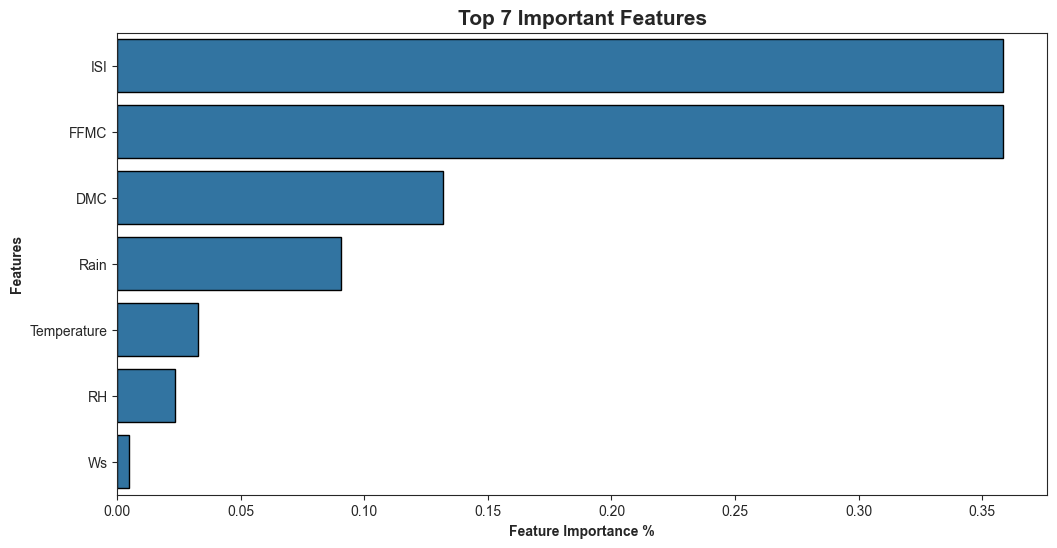

In [940]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=importance_df, x='importance', y='feature',ec = 'black')
ax.set_title('Top 7 Important Features', weight='bold',fontsize = 15)
ax.set_xlabel('Feature Importance %',weight='bold')
ax.set_ylabel('Features',weight='bold')
plt.show()

In [941]:
X_train_new = X_train.drop(['Rain', 'RH'], axis=1)
X_test_new = X_test.drop(['Rain', 'RH'], axis=1)

In [942]:
X_train_new.columns

Index(['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [943]:
X_test_new.columns

Index(['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [944]:
X_train_new_scaled, X_test_new_scaled = scaler_standard(X_train_new, X_test_new)

In [945]:
best_random_grid.fit(X_train_new_scaled, y_train)
bestrf_pred = best_random_grid.predict(X_test_new_scaled)
bestrf_pred

array([1.05900000e+01, 7.82408333e+00, 7.89341667e+00, 4.64058333e+00,
       8.58900000e+00, 1.22381667e+01, 2.40166667e-01, 9.66658333e+00,
       6.74625000e+00, 1.32786667e+01, 1.26141667e+00, 1.47233333e+01,
       5.90225000e+00, 1.67050833e+01, 6.64000000e-01, 2.93750000e-01,
       1.54150000e+00, 2.16858333e+00, 4.56191667e+00, 3.25000000e-01,
       6.09708333e+00, 6.39216667e+00, 3.66875000e+00, 2.30166667e-01,
       2.79908333e+00, 2.81508333e+00, 1.06715000e+01, 3.52250000e-01,
       2.35416667e-01, 1.20900000e+00, 1.76999167e+01, 3.95500000e-01,
       2.88750000e-01, 2.16020833e+01, 4.92425000e+00, 8.39833333e-01,
       8.09833333e-01, 1.43755000e+01, 2.73309167e+01, 1.54183333e+00,
       8.18950000e+00, 7.98666667e-01, 1.04500000e-01, 2.09133333e+00,
       9.00666667e-01, 4.45000000e-02, 3.52116667e+00, 7.45666667e+00,
       6.00000000e-03, 3.99416667e+00, 5.22508333e+00, 1.09474167e+01,
       2.82500000e-02, 2.56525000e+00, 7.23058333e+00, 2.26683333e+00,
      

In [946]:
meanAbErr = metrics.mean_absolute_error(y_test, bestrf_pred)
meanSqErr = metrics.mean_squared_error(y_test, bestrf_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, bestrf_pred))

r2 =  r2_score(y_test, K_Neighbors_Regressor_prediction)


print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print("R-Square:",r2)

Mean Absolute Error: 0.6791448087431694
Mean Square Error: 0.842750676001821
Root Mean Square Error: 0.918014529297778
R-Square: 0.9465925702623768


## Classification

In [947]:
df2.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [948]:
X = df2.iloc[:, 0:10]
y = df2['Classes']

In [949]:
X.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9


In [950]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: Classes, dtype: int32

In [951]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((170, 10), (73, 10))

In [952]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI'],
      dtype='object')

In [953]:
corr_features = correlation(X_train, 0.8)
corr_features

{'BUI', 'DC', 'FWI'}

In [954]:
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((170, 7), (73, 7))

In [955]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

### Logistic Regression

In [956]:
# Import Logistic Regression to Train from SKlearn
Logistic_Regression  = LogisticRegression()
Logistic_Regression.fit(X_train_scaled,y_train)

LogisticRegression()

In [957]:
print('Intercept is :',Logistic_Regression.intercept_)
print('Coefficient is :',Logistic_Regression.coef_)

Intercept is : [0.64920905]
Coefficient is : [[-0.00988359  0.2475491  -0.22762311 -0.53557828  2.54097133  0.93198056
   2.75297352]]


In [958]:
print("Training Score:",Logistic_Regression.score(X_train_scaled, y_train))
print("Test Score:",Logistic_Regression.score(X_test_scaled,y_test))

Training Score: 0.9705882352941176
Test Score: 0.9178082191780822


In [959]:
Logistic_Regression_Prediction = Logistic_Regression.predict(X_test_scaled)
Logistic_Regression_Prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [960]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Logistic_Regression_Prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [961]:
Score = accuracy_score(y_test,Logistic_Regression_Prediction)
Classification_Report = classification_report(y_test,Logistic_Regression_Prediction)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Logistic Regression
Accuracy Score value: 0.9178
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        30
           1       0.97      0.88      0.93        43

    accuracy                           0.92        73
   macro avg       0.91      0.93      0.92        73
weighted avg       0.92      0.92      0.92        73



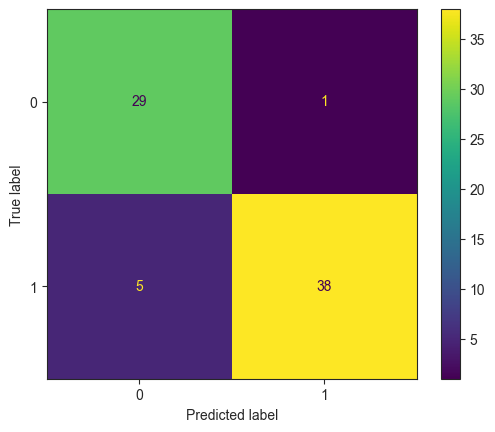

In [962]:
Logistic_Regression_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(Logistic_Regression, X_test_scaled, y_test)
Logistic_Regression_Confusion_Matrix

### Decision Tree

In [963]:
Decision_Tree_Classifier = DecisionTreeClassifier()
Decision_Tree_Classifier.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [964]:
Decision_Tree_Classifier_prediction = Decision_Tree_Classifier.predict(X_test_scaled)
Decision_Tree_Classifier_prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [965]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Decision_Tree_Classifier_prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [966]:
Score = accuracy_score(y_test,Decision_Tree_Classifier_prediction)
Classification_Report = classification_report(y_test,Decision_Tree_Classifier_prediction)

print("Decision Tree")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Decision Tree
Accuracy Score value: 0.9452
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       0.98      0.93      0.95        43

    accuracy                           0.95        73
   macro avg       0.94      0.95      0.94        73
weighted avg       0.95      0.95      0.95        73



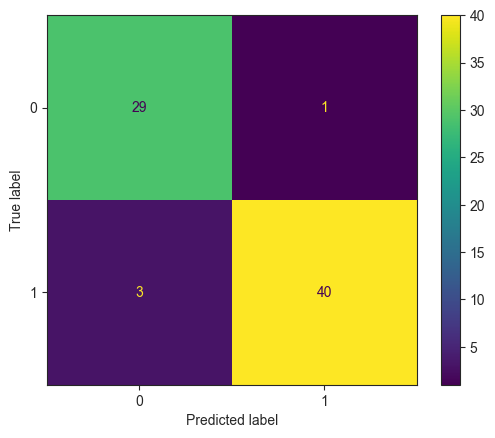

In [967]:
Decision_Tree_Classifier_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(Decision_Tree_Classifier, X_test_scaled, y_test)
Decision_Tree_Classifier_Confusion_Matrix

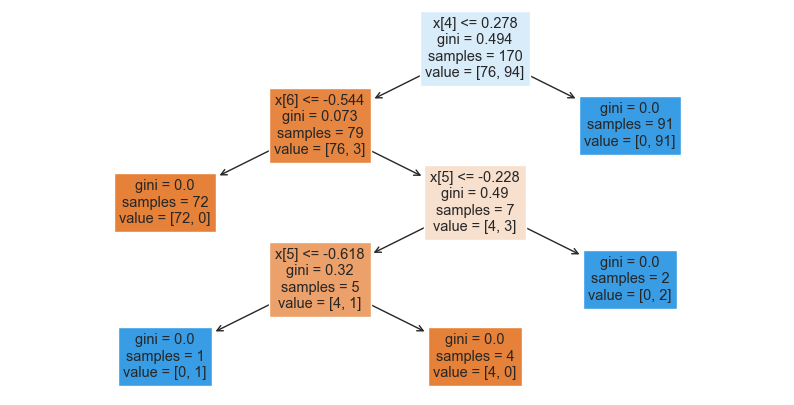

In [968]:
plt.figure(figsize = (10,5))
tree.plot_tree(Decision_Tree_Classifier,filled = True)
plt.show()

### Random Forest

In [969]:
Random_Forest_Classifier = RandomForestClassifier()
Random_Forest_Classifier.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [970]:
print("Training Score:",Random_Forest_Classifier.score(X_train_scaled, y_train))
print("Test Score:",Random_Forest_Classifier.score(X_test_scaled,y_test))

Training Score: 1.0
Test Score: 0.9863013698630136


In [971]:
Random_Forest_Classifier_prediction = Random_Forest_Classifier.predict(X_test_scaled)
Random_Forest_Classifier_prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [972]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Random_Forest_Classifier_prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [973]:
Score = accuracy_score(y_test,Random_Forest_Classifier_prediction)
Classification_Report = classification_report(y_test,Random_Forest_Classifier_prediction)

print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Random Forest
Accuracy Score value: 0.9863
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        43

    accuracy                           0.99        73
   macro avg       0.98      0.99      0.99        73
weighted avg       0.99      0.99      0.99        73



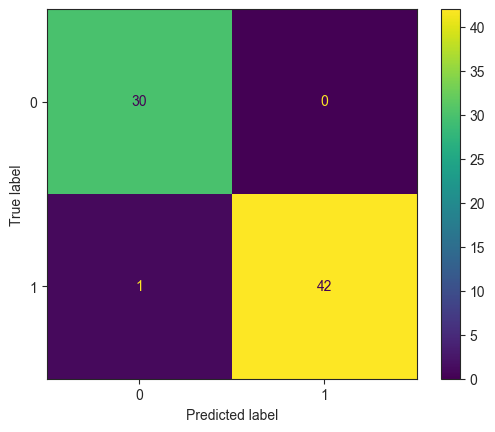

In [974]:
Random_Forest_Classifier_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(Random_Forest_Classifier, X_test_scaled, y_test)
Random_Forest_Classifier_Confusion_Matrix

### K_Neighbors Classifier

In [975]:
# KNeighborsClassifier to Train from SKlearn
K_Neighbors_Classifier = KNeighborsClassifier()
K_Neighbors_Classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [976]:
print("Training Score:",K_Neighbors_Classifier.score(X_train_scaled, y_train))
print("Test Score:",K_Neighbors_Classifier.score(X_test_scaled,y_test))

Training Score: 0.9647058823529412
Test Score: 0.9315068493150684


In [977]:
K_Neighbors_Classifier_prediction = K_Neighbors_Classifier.predict(X_test_scaled)
K_Neighbors_Classifier_prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [978]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': K_Neighbors_Classifier_prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [979]:
Score = accuracy_score(y_test,K_Neighbors_Classifier_prediction)
Classification_Report = classification_report(y_test,K_Neighbors_Classifier_prediction)

print("KNeighbors Classifier")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

KNeighbors Classifier
Accuracy Score value: 0.9315
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        30
           1       0.95      0.93      0.94        43

    accuracy                           0.93        73
   macro avg       0.93      0.93      0.93        73
weighted avg       0.93      0.93      0.93        73



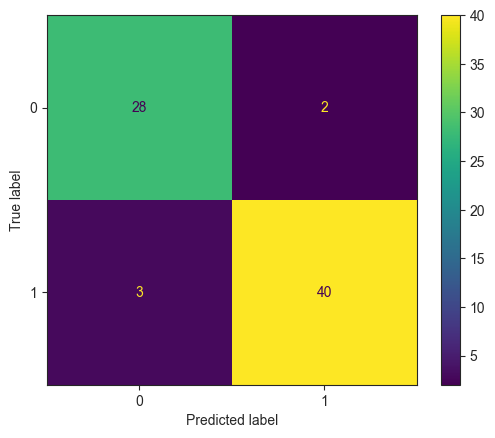

In [980]:
K_Neighbors_Classifier_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(K_Neighbors_Classifier, X_test_scaled, y_test)
K_Neighbors_Classifier_Confusion_Matrix

## XGboost Model

In [981]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [982]:
print("Training Score:",xgb.score(X_train_scaled, y_train))
print("Test Score:",xgb.score(X_test_scaled,y_test))

Training Score: 0.9941176470588236
Test Score: 0.9726027397260274


In [983]:
xgb_predic = xgb.predict(X_test_scaled)
xgb_predic

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [984]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': xgb_predic})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [985]:
Score = accuracy_score(y_test, xgb_predic)
Classification_Report = classification_report(y_test, xgb_predic)

print("XGboost Classifier")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

XGboost Classifier
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.95      0.98        43

    accuracy                           0.97        73
   macro avg       0.97      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



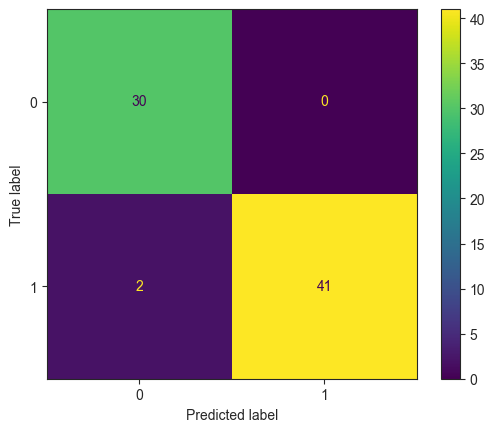

In [986]:
xgb_cm = ConfusionMatrixDisplay.from_estimator(xgb, X_test_scaled, y_test)

## Accuracy score Results Summary
### Models 	Accuracy score
#### Random Forest Classifier 	-97.26 %
#### XGboost classifier 	97.26 %
#### Decision Tree Classifier 	-94.52 %
#### KNeighbors Classifier 	-93.15 %
#### Logistic Regression Accurracy 	-91.78 %

## HyperParameter Tuning

#### XGboost classifier Tuning


In [987]:
params={
 "learning_rate"    : (np.linspace(0,10, 100)) ,
 "max_depth"        : (np.linspace(1,50, 25,dtype=int)),
 "min_child_weight" : [1, 3, 5, 7],
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]}
Random_xgb = RandomizedSearchCV(xgb, params, cv = 10,n_jobs = -1)
Random_xgb.fit(X_train_scaled, y_train).best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.20202020202020202,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [988]:
Best_xgb = Random_xgb.best_estimator_
Best_xgb.score(X_test_scaled,y_test)

0.9726027397260274

In [989]:
Bestxgb_prediction = Best_xgb.predict(X_test_scaled)
Bestxgb_prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [990]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Bestxgb_prediction})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [991]:
Score = accuracy_score(y_test, Bestxgb_prediction)
Classification_Report = classification_report(y_test,Bestxgb_prediction)
print("FINAL XGB")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

FINAL XGB
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.95      0.98        43

    accuracy                           0.97        73
   macro avg       0.97      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



### Random Forest classifier Tuning

In [992]:
params = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}
Random_rf = RandomizedSearchCV(Random_Forest_Classifier, params, cv = 10,n_jobs = -1)
Random_rf.fit(X_train_scaled, y_train).best_estimator_

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", 

RandomForestClassifier(max_depth=18, max_features='log2', min_samples_leaf=4,
                       min_samples_split=6, n_estimators=115)

In [993]:
Best_rf = Random_rf.best_estimator_
Best_rf.score(X_test_scaled,y_test)

0.9726027397260274

In [994]:
Bestrf_pred = Best_rf.predict(X_test_scaled)
Bestrf_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [995]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': Bestrf_pred})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [996]:
Score = accuracy_score(y_test, Bestrf_pred)
Classification_Report = classification_report(y_test,Bestrf_pred)
print("FINAL Random Forest")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

FINAL Random Forest
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       1.00      0.95      0.98        43

    accuracy                           0.97        73
   macro avg       0.97      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



### Model Selection

In [997]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skfold = StratifiedKFold(n_splits= 10,shuffle= True,random_state= 0)

In [998]:
cv_rf=cross_val_score(Random_Forest_Classifier,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score Random Forest {:.4f}'.format(cv_rf))

CV Score Random Forest 0.9793


In [999]:
cv_dt =cross_val_score(Decision_Tree_Classifier,X,y,cv= skfold,scoring="accuracy").mean()
print('CV Score Decision Tree {:.4f}'.format(cv_dt))

CV Score Decision Tree 0.9712


In [1000]:
cv_knn =cross_val_score(K_Neighbors_Classifier,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score KNN Classifier {:.4f}'.format(cv_knn))

CV Score KNN Classifier 0.9052


In [1001]:
cv_lg=cross_val_score(Logistic_Regression,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score Logistic Regression {:.4f}'.format(cv_lg))

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

CV Score Logistic Regression 0.9630


### Model Selection

In [1002]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skfold = StratifiedKFold(n_splits= 10,shuffle= True,random_state= 0)

In [1003]:
cv_xgb= cross_val_score(Best_xgb,X,y,cv=skfold,scoring='accuracy').mean()
print('CV Score XGB Tuned {:.4f}'.format(cv_xgb))

CV Score XGB Tuned 0.9793


In [1004]:
cv_rf=cross_val_score(Random_Forest_Classifier,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score Random Forest {:.4f}'.format(cv_rf))

CV Score Random Forest 0.9793


In [1005]:
cv_dt =cross_val_score(Decision_Tree_Classifier,X,y,cv= skfold,scoring="accuracy").mean()
print('CV Score Decision Tree {:.4f}'.format(cv_dt))

CV Score Decision Tree 0.9753


In [1006]:
cv_knn =cross_val_score(K_Neighbors_Classifier,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score KNN Classifier {:.4f}'.format(cv_knn))

CV Score KNN Classifier 0.9052


In [1007]:
cv_lg=cross_val_score(Logistic_Regression,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score Logistic Regression {:.4f}'.format(cv_lg))

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

CV Score Logistic Regression 0.9630


C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

## 7.2 Score score Results Summary
### Models 	Accuracy score
#### XGBoost Classifier 	-97.52 %
#### Random Forest 	-97.52 %
#### K Neighbors Classifier -	97.52 %
#### Decision Tree Classifier 	-97.52 %
#### Logistic Regression 	-96.32 %


### Fetaure Selection for Model Deployment

Text(0, 0.5, 'Features')

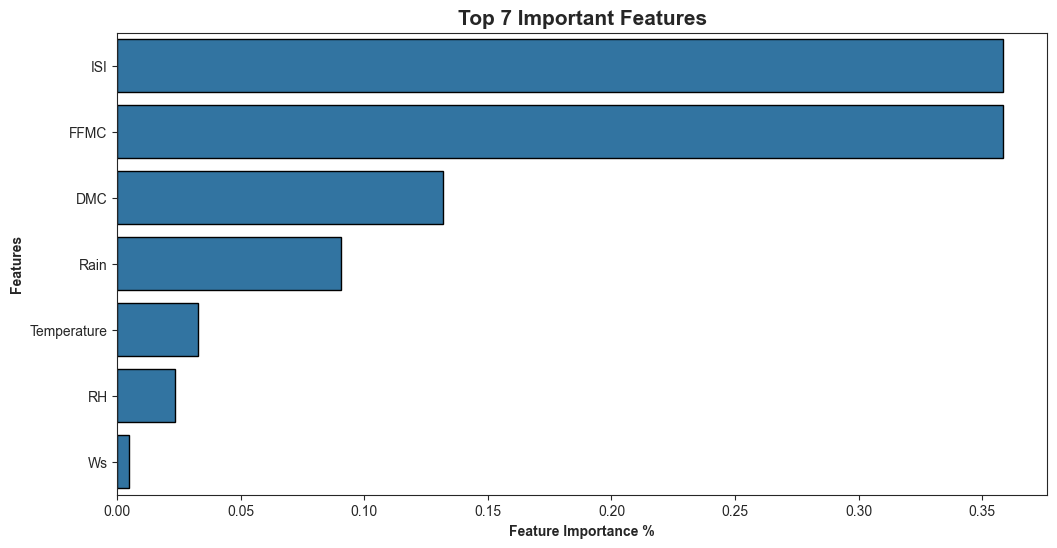

In [1008]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=importance_df, x='importance', y='feature',ec = 'black')
ax.set_title('Top 7 Important Features', weight='bold',fontsize = 15)
ax.set_xlabel('Feature Importance %',weight='bold')
ax.set_ylabel('Features',weight='bold')

### Model Deployment

In [1009]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [1010]:
X_train_new = X_train.drop(['Rain', 'RH'], axis=1)
X_test_new = X_test.drop(['Rain', 'RH'], axis=1)

In [1011]:
X_train_new.columns

Index(['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [1012]:
X_test_new.columns

Index(['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [1013]:
X_train_new_scaled, X_test_new_scaled = scaler_standard(X_train_new, X_test_new)

In [1014]:
xgb_model =Random_xgb.fit(X_train_new_scaled, y_train).best_estimator_
xgb_model.score(X_test_new_scaled, y_test)

0.9863013698630136

In [1015]:
xgb_model_pred = xgb_model.predict(X_test_new_scaled)
xgb_model_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [1016]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': xgb_model_pred})    
Actual_predicted

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [1017]:
Score = accuracy_score(y_test, xgb_model_pred)
Classification_Report = classification_report(y_test, xgb_model_pred)
print("Final Model XGB")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Final Model XGB
Accuracy Score value: 0.9863
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.98      1.00      0.99        43

    accuracy                           0.99        73
   macro avg       0.99      0.98      0.99        73
weighted avg       0.99      0.99      0.99        73

